# Explicação:
Nesse arquivo há:
 - Junção e análise dos dados em catálogo usados para a tarefa de pré-treino.
Especificamente:
 - Tratamento do arquivo de 22GB dos objetos do Stripe82 do DR4
 - Selecão de objetos para o primeiro conjunto de pré-treino (filtrados, sem valores de 99 e seguindo a distribuição correta)
 - Breve análise desses dados

In [2]:
import pandas as pd
import numpy as np


### Gera CSV limpo:

In [4]:
columns = ['ID', 'RA', 'DEC', 'A', 'B', 'KRON_RADIUS', 'FWHM_n', 'e_r_iso', 'u_iso', 'J0378_iso', 'J0395_iso', 'J0410_iso', 'J0430_iso', 'g_iso', 'J0515_iso', 'r_iso', 
'J0660_iso', 'i_iso', 'J0861_iso', 'z_iso','SEX_FLAGS_r']
datafile = "/media/gjperin/64gbgabriel/STRIPE82_iDR4.csv"
chunksize = 100000
dfs = []
for chunk in pd.read_csv(datafile, chunksize=chunksize):
    useful = chunk[columns]
    useful = useful[(useful.SEX_FLAGS_r == 0) & (useful.r_iso < 22)]
    dfs.append(useful)

final = pd.concat(dfs)

In [15]:
final['ID'] = final['ID'].str[2:30]

In [14]:
final.to_csv('./raw_tables/S82_clean.csv')

### Retira objetos com classificação

In [3]:
unl = pd.read_csv("raw_tables/S82_clean.csv")
clf = pd.read_csv("../clf/clf.csv")
print(f"unl possui {len(unl)} linhas")
print(f"clf possui {len(clf)} linhas")

unl possui 3179663 linhas
clf possui 133131 linhas


In [4]:
clf = clf.ID
x = pd.merge(unl,clf, indicator=True, how='outer', on="ID").query('_merge=="left_only"').drop('_merge', axis=1)
print(f"x possui {len(x)} linhas")

x possui 3046532 linhas


### Retira objetos com magnitude 99

In [5]:
x = x[(x['u_iso']!= 99) & (x['J0378_iso']!= 99) & (x['J0395_iso']!= 99) & (x['J0410_iso']!= 99) & (x['J0430_iso']!= 99) & (x['g_iso']!= 99) & (x['J0515_iso']!= 99) & 
      (x['r_iso'] != 99) & (x['J0660_iso']!= 99) & (x['i_iso']!= 99) & (x['J0861_iso']!= 99) & (x['z_iso']!= 99) ]

### Análise da distribuição:

In [6]:
print(f"Existem {len(x[x.r_iso<=14])} objetos com magnitude <= 14")
for i in range(15,23):
    c = len(x[(x.r_iso>i-1)&(x.r_iso<=i)])
    print(f"Existem {c} objetos com magnitude {i-1}<r<={i} ({c/len(x)*100}%)")

Existem 17648 objetos com magnitude <= 14
Existem 25165 objetos com magnitude 14<r<=15 (2.1083242152744384%)
Existem 44332 objetos com magnitude 15<r<=16 (3.714135867734806%)
Existem 74477 objetos com magnitude 16<r<=17 (6.239684584978913%)
Existem 120550 objetos com magnitude 17<r<=18 (10.099681468362151%)
Existem 182653 objetos com magnitude 18<r<=19 (15.302672079973057%)
Existem 238015 objetos com magnitude 19<r<=20 (19.940901573556342%)
Existem 265689 objetos com magnitude 20<r<=21 (22.25942986020466%)
Existem 225073 objetos com magnitude 21<r<=22 (18.856620548558062%)


### Retirar objetos com erro maior que 0.05

In [15]:
small_noise = x[x.e_r_iso < 0.05].sample(n=120000, axis = 'index', random_state=2)


In [20]:
small_noise.to_csv("unl_small_noise.csv")

### Podar os dados para a distribuição desejada:

In [6]:
p = {(19,20):238015, (20,21):190412, (18,19):174733, (21,22):155843, (17,18):104839, (16,17):51947, (15,16):23612, (14,15):1889}
datafs = []
for key in p.keys():
    t = x[(x.r_iso > key[0]) & (x.r_iso <= key[1])]
    datafs.append(t.sample(n = p[key], axis='index', random_state=2))
final_b = pd.concat(datafs).reset_index(drop=True)

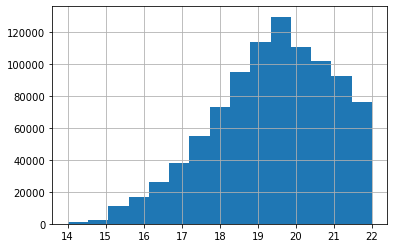

In [7]:
final_b.r_iso.hist(bins=15)

In [8]:
p = {(19,20):238015//8, (20,21):190412//8, (18,19):174733//8, (21,22):155843//8, (17,18):104839//8, (16,17):51947//8, (15,16):23612//8, (14,15):1889//8}
datafs = []
for key in p.keys():
    t = x[(x.r_iso > key[0]) & (x.r_iso <= key[1])]
    datafs.append(t.sample(n = p[key], axis='index', random_state=2))
final_s = pd.concat(datafs).reset_index(drop=True)

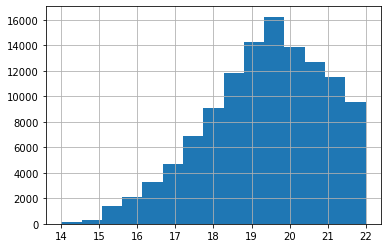

In [9]:
final_s.r_iso.hist(bins=15)

### Retira objetos sem imagem

In [10]:
IDS = ['iDR4_3_STRIPE82-0074_0050444',
'iDR4_3_STRIPE82-0088_0134958',
'iDR4_3_STRIPE82-0119_0007873',
'iDR4_3_STRIPE82-0121_0000836',
'iDR4_3_STRIPE82-0134_0029763',
'iDR4_3_STRIPE82-0087_0139570',
'iDR4_3_STRIPE82-0042_0044839',
'iDR4_3_STRIPE82-0130_0029840',
'iDR4_3_STRIPE82-0158_0030865',
'iDR4_3_STRIPE82-0087_0139219',
'iDR4_3_STRIPE82-0110_0066277',
'iDR4_3_STRIPE82-0088_0132786',
'iDR4_3_STRIPE82-0110_0074857',
'iDR4_3_STRIPE82-0088_0137405',
'iDR4_3_STRIPE82-0042_0044898',
'iDR4_3_STRIPE82-0121_0002535',
'iDR4_3_STRIPE82-0110_0074358',
'iDR4_3_STRIPE82-0119_0000975',
'iDR4_3_STRIPE82-0088_0136078',
'iDR4_3_STRIPE82-0034_0030830',
'iDR4_3_STRIPE82-0092_0104473',
'iDR4_3_STRIPE82-0119_0005304',
'iDR4_3_STRIPE82-0121_0003994',
'iDR4_3_STRIPE82-0121_0002900',
'iDR4_3_STRIPE82-0119_0003104',
'iDR4_3_STRIPE82-0036_0013965',
'iDR4_3_STRIPE82-0088_0138553']
final_s = final_s[~(final_s.ID.isin(IDS))]

### Train/Test/Val Split

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_s, test_size=0.25,random_state=2)
train, val = train_test_split(train, test_size=0.2,random_state=2)
train = train.assign(split="train")
test = test.assign(split="test")
val = val.assign(split="val")
final_s = pd.concat([train,test,val])    

In [19]:
final_s.to_csv("unl_small.csv")
final_b.to_csv("unl_big.csv")

In [2]:
import pandas as pd
final_s = pd.read_csv("unl_small.csv")

In [15]:
final_s[ ['u_iso', 'J0378_iso', 'J0395_iso', 'J0410_iso', 'J0430_iso', 'g_iso', 'J0515_iso', 'r_iso', 
'J0660_iso', 'i_iso', 'J0861_iso', 'z_iso']].max().max()

36.972713